In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [6]:
df = pd.read_csv("../data/insurance.csv")

# Preview the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# See what values exist in non-numeric columns
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")


sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


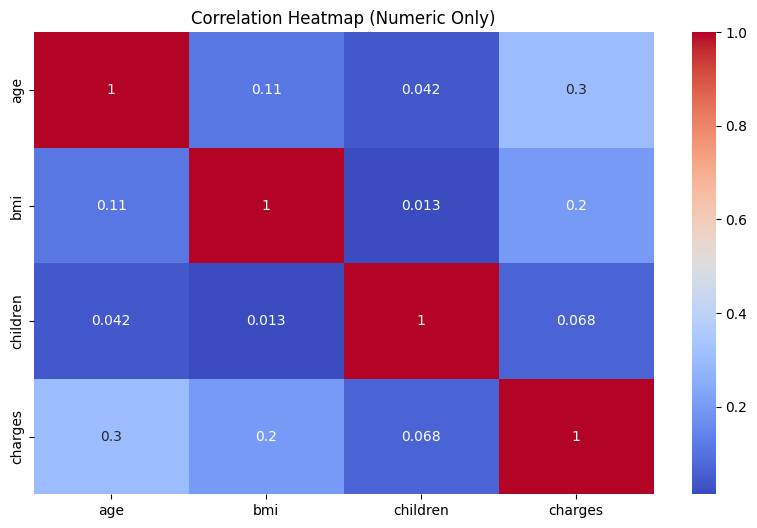

In [9]:
# Select numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Only)")
plt.show()


In [10]:
# Make a copy and encode categorical features
df_encoded = df.copy()
label_cols = ['sex', 'smoker', 'region']

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


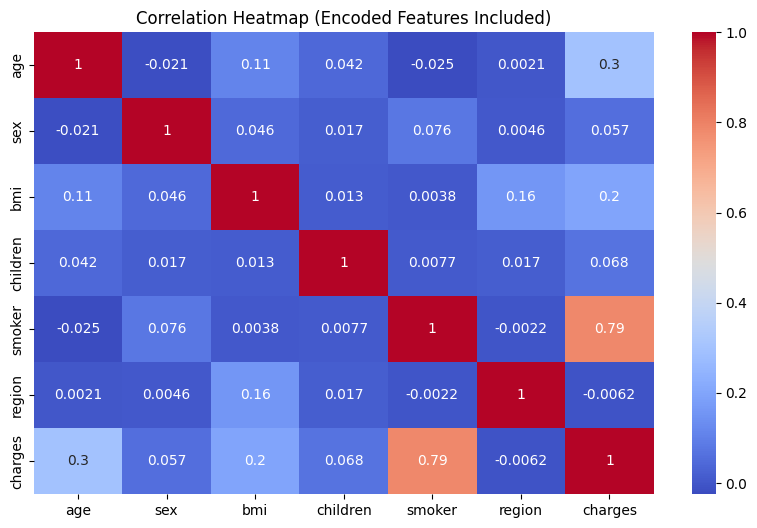

In [11]:
# Correlation on fully encoded dataset
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Encoded Features Included)")
plt.show()


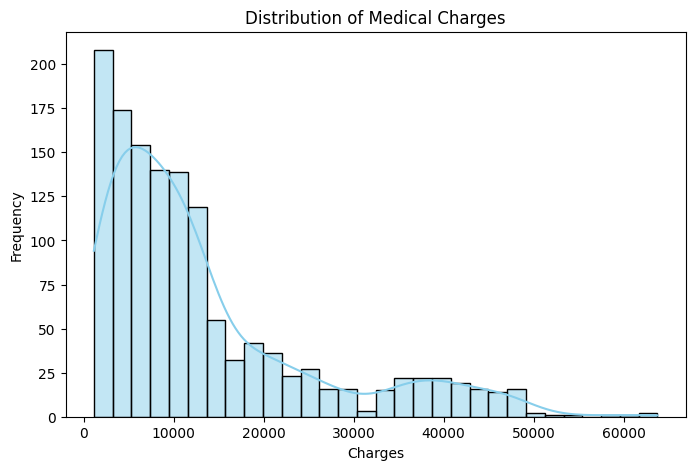

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Medical Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()


C:\Users\Riddhima\AppData\Local\Temp\ipykernel_14972\2925372400.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


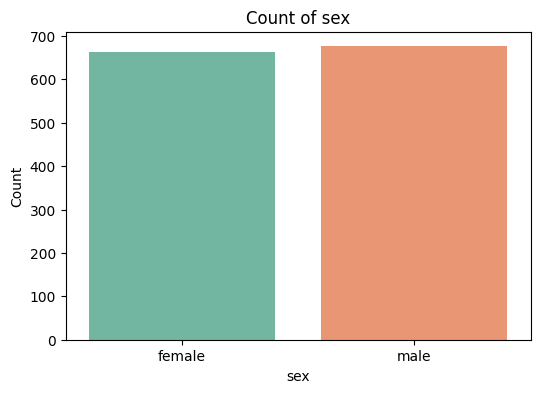

C:\Users\Riddhima\AppData\Local\Temp\ipykernel_14972\2925372400.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


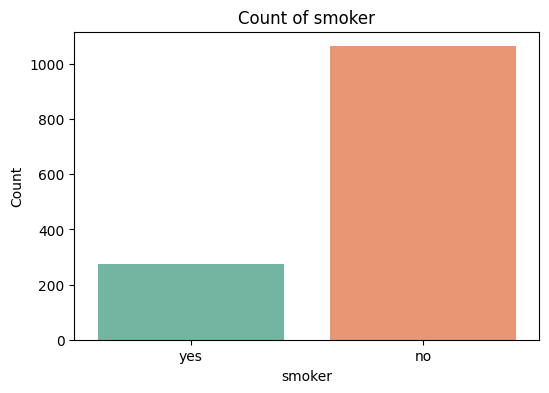

C:\Users\Riddhima\AppData\Local\Temp\ipykernel_14972\2925372400.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


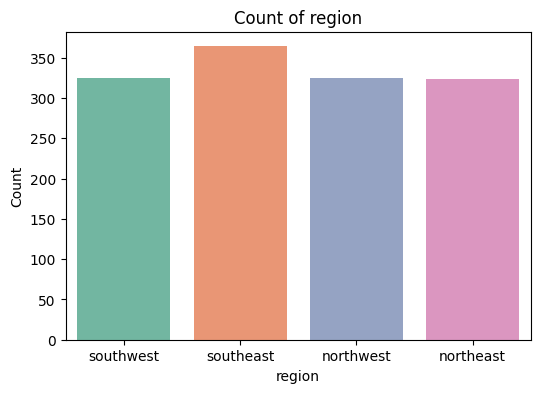

In [13]:
categorical_cols = ['sex', 'smoker', 'region']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Count of {col}")
    plt.ylabel("Count")
    plt.show()


C:\Users\Riddhima\AppData\Local\Temp\ipykernel_14972\1154233357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='charges', palette='Set3')


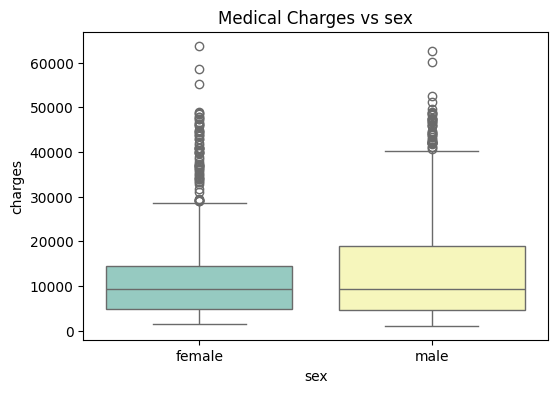

C:\Users\Riddhima\AppData\Local\Temp\ipykernel_14972\1154233357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='charges', palette='Set3')


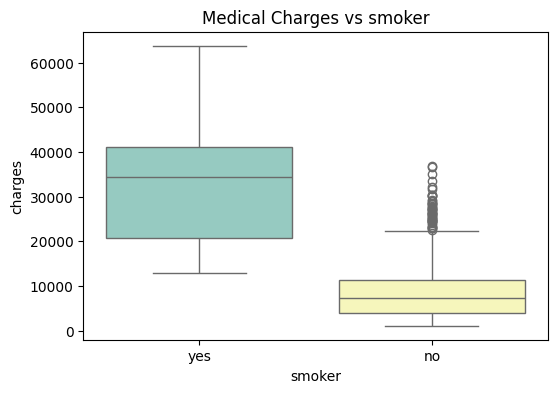

C:\Users\Riddhima\AppData\Local\Temp\ipykernel_14972\1154233357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='charges', palette='Set3')


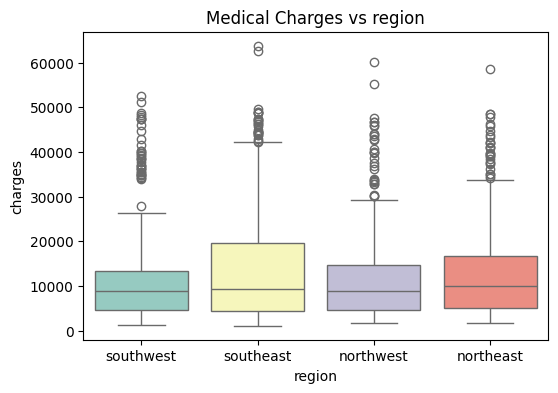

In [14]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col, y='charges', palette='Set3')
    plt.title(f"Medical Charges vs {col}")
    plt.show()


In [15]:
correlation = df_encoded.corr()['charges'].sort_values(ascending=False)
print("Correlation of features with charges:\n", correlation)


Correlation of features with charges:
 charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
df_encoded = df.copy()

# Label Encoding for 'sex', 'smoker', 'region'
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df_encoded['sex'] = le_sex.fit_transform(df_encoded['sex'])
df_encoded['smoker'] = le_smoker.fit_transform(df_encoded['smoker'])
df_encoded['region'] = le_region.fit_transform(df_encoded['region'])

df_encoded.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
X = df_encoded.drop('charges', axis=1)  # Features
y = df_encoded['charges']               # Target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib



In [ ]:


def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} R² Score: {r2:.2f}")


TypeError: got an unexpected keyword argument 'squared'

In [22]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Evaluate
evaluate_model("Linear Regression", y_test, lr_preds)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Evaluate
evaluate_model("Random Forest Regressor", y_test, rf_preds)

# XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

# Evaluate
evaluate_model("XGBoost Regressor", y_test, xgb_preds)



Linear Regression Performance:
Mean Absolute Error (MAE): 4186.508898366432
Mean Squared Error (MSE): 33635210.431178406


TypeError: got an unexpected keyword argument 'squared'